In [3]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random

Timestep:1, Firefighter Position:0, Action:1,Reward: 0.0


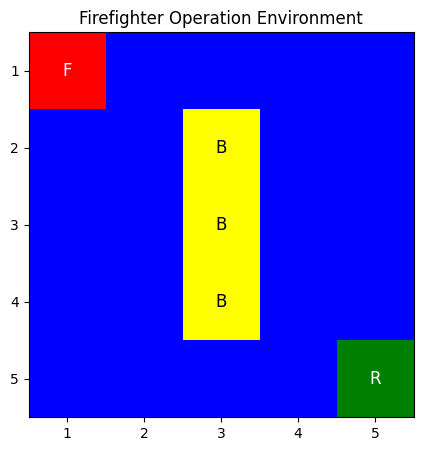

Timestep:2, Firefighter Position:0, Action:1,Reward: 0.0


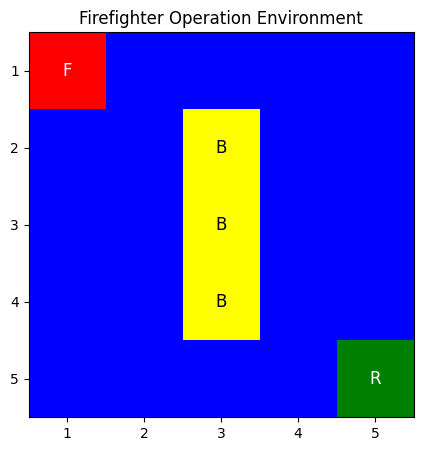

Timestep:3, Firefighter Position:0, Action:1,Reward: 0.0


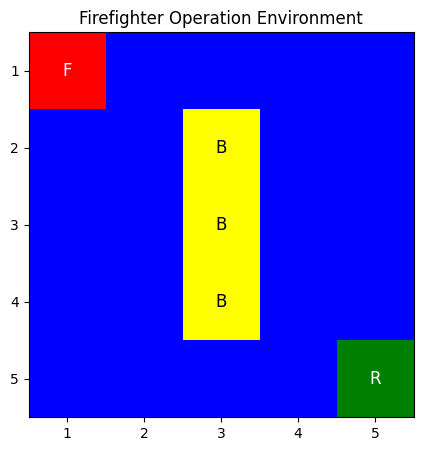

Timestep:4, Firefighter Position:1, Action:2,Reward: 0.0


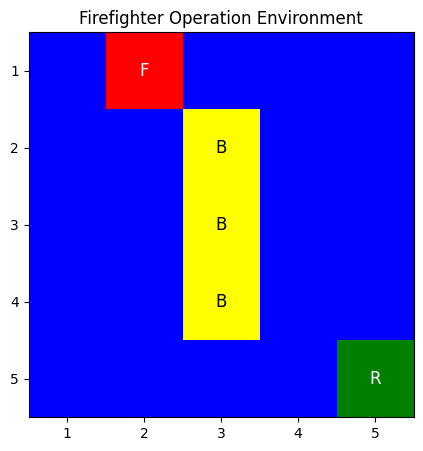

Timestep:5, Firefighter Position:0, Action:3,Reward: 0.0


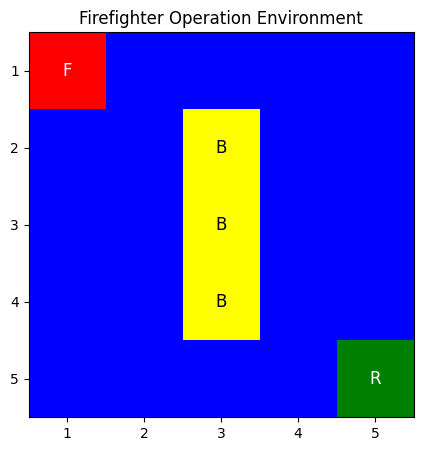

Timestep:6, Firefighter Position:5, Action:0,Reward: 0.0


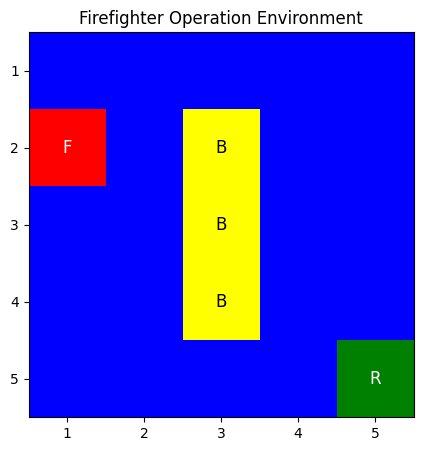

Timestep:7, Firefighter Position:0, Action:1,Reward: 0.0


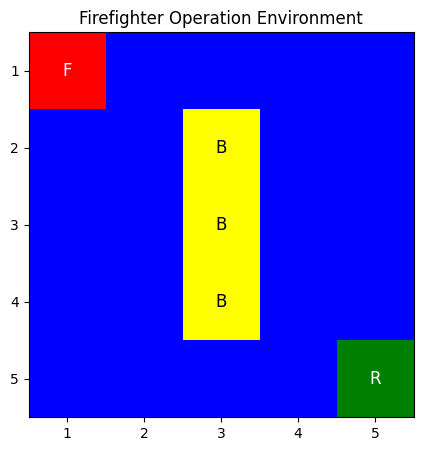

Timestep:8, Firefighter Position:0, Action:1,Reward: 0.0


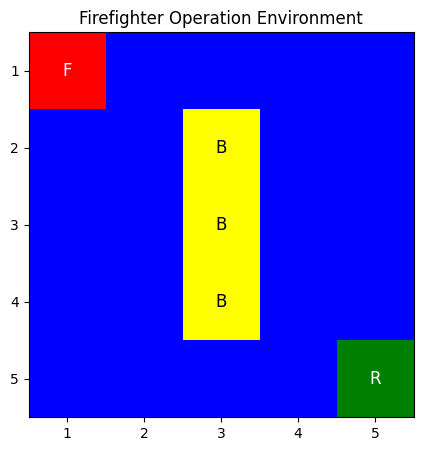

Timestep:9, Firefighter Position:0, Action:3,Reward: 0.0


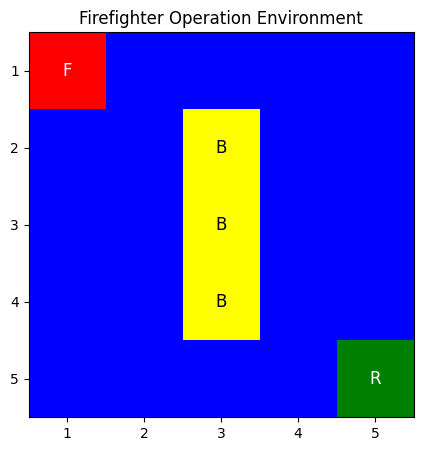

Timestep:10, Firefighter Position:0, Action:3,Reward: 0.0


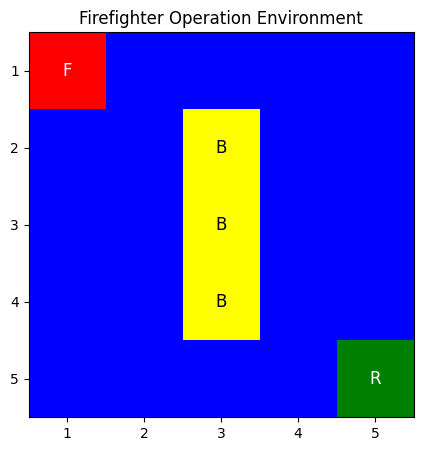

Episode terminated.


In [4]:
class FireFightersOperation(gym.Env):
    metadata = {'render.modes': ['human']}
 
    def __init__(self):
        super(FireFightersOperation, self).__init__()

        self.grid_size = 5  #setting the grid size
        self.max_timesteps = 10  #setting the maximum timesteps
        self.timestep = 0  #initializing the time step

        self.observation_space = spaces.Discrete(self.grid_size * self.grid_size)  #setting the observation space, 5x5  = 25 squares
        self.action_space = spaces.Discrete(4)  #there are 4 actions - up, down, right, left

        self.rewards = np.zeros((self.grid_size, self.grid_size))  #first we initialize all the rewards to zero
        self.rewards[4, 4] = 20  #this is my final reward square
        self.rewards[1, 2] = -10  #The following three are negative rewards
        self.rewards[2, 2] = -10
        self.rewards[3, 2] = -10
 
        self.firefighter_position = [0, 0]  #setting the agent position as 0,0

    def reset(self):  #this function is used to reset everything [timesteps, agent position, states]

        self.timestep = 0
        self.firefighter_position = [0, 0]
        state = self._get_state()
        return state, {}

    def step(self, action):  #this is for defning the actions for the agents to move

        if action == 0:  #down
            self.firefighter_position[0] += 1
        elif action == 1:  #up
            self.firefighter_position[0] -= 1
        elif action == 2:  #right
            self.firefighter_position[1] += 1
        elif action == 3:  #left
            self.firefighter_position[1] -= 1

        self.firefighter_position = np.clip(self.firefighter_position, 0, self.grid_size - 1)  #this clips the agent to not move outside the given observation space
        reward = self.rewards[tuple(self.firefighter_position)]  #tupling the rewards
        self.timestep += 1  #increasing the timesteps
        terminated = self.timestep >= self.max_timesteps or reward == 20  #stopping citerion: if the max timesteps is reached or if the reward is reached
        truncated = False 
        state = self._get_state()
        return state, reward, terminated, truncated, {}

    def render(self, mode='human'):

        grid = np.full((self.grid_size, self.grid_size), 0, dtype=int)
        grid[tuple(self.firefighter_position)] = 1  # Firefighter
        grid[self.rewards == 20] = 2  # Rescue target
        grid[self.rewards == -10] = 3  # Burning rooms


        cmap = ListedColormap(['blue', 'red', 'green', 'yellow'])  # blue for empty, red for firefighter, green for rescue, yellow for burning rooms
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.imshow(grid, cmap=cmap, interpolation='nearest')
        ax.set_xticks(np.arange(self.grid_size))
        ax.set_yticks(np.arange(self.grid_size))
        ax.set_xticklabels(np.arange(1, self.grid_size + 1))
        ax.set_yticklabels(np.arange(1, self.grid_size + 1))

        for i in range(self.grid_size):
            for j in range(self.grid_size):
                if grid[i, j] == 1:
                    ax.text(j, i, 'F', ha='center', va='center', color='white', fontsize=12)
                elif grid[i, j] == 2:
                    ax.text(j, i, 'R', ha='center', va='center', color='white', fontsize=12)
                elif grid[i, j] == 3:
                    ax.text(j, i, 'B', ha='center', va='center', color='black', fontsize=12)

        ax.set_title('Firefighter Operation Environment')
        
        plt.show()

    def _get_state(self):

        return self.firefighter_position[0] * self.grid_size + self.firefighter_position[1]

env = FireFightersOperation()

for t in range(10):
    action = env.action_space.sample()
    state, reward, terminated, truncated, _ = env.step(action)
    print(f"Timestep:{t+1}, Firefighter Position:{state}, Action:{action},Reward: {reward}")  #print the state and action info
    env.render()
    if terminated:
        print("Episode terminated.")
        break